# Interpolation
$$ Ryumei Nakada$$

In [1]:
include("MyLinInterp.jl")

MyLinInterp

In [2]:
;cat "MyLinInterp.jl"

module MyLinInterp

  export LinearInterpolation

  immutable LinearInterpolation # Inplementation as a type class
    grid::Array
    vals::Array
  end

  function call(a::LinearInterpolation, xs)
    map(xs) do x
      a.grid[1] <= x <= a.grid[end] || throw(DomainError()) # throw an error if input x is out of domain

      i = searchsortedlast(a.grid, x) # find the first index i in grid where grid[i] >= x
      if i == length(a.grid)
        return a.vals[end]
      else
        return a.vals[i] + (a.vals[i+1] - a.vals[i]) / (a.grid[i+1] - a.grid[i]) * (x - a.grid[i])
      end
    end
  end

end


In [3]:
println("これを用いてlogを線形補間してみる")
cgrid = linspace(1, 10, 5)
cvals = log(cgrid)
println("cgridとして[1, 10]を5分割した配列をとり, logを適用した値をcvalに格納")

a = MyLinInterp.LinearInterpolation(cgrid, cvals)
println("この線形補間された関数とlogをplotしてみる")

これを用いてlogを線形補間してみる
cgridとして[1, 10]を5分割した配列をとり, logを適用した値をcvalに格納
この線形補間された関数とlogをplotしてみる


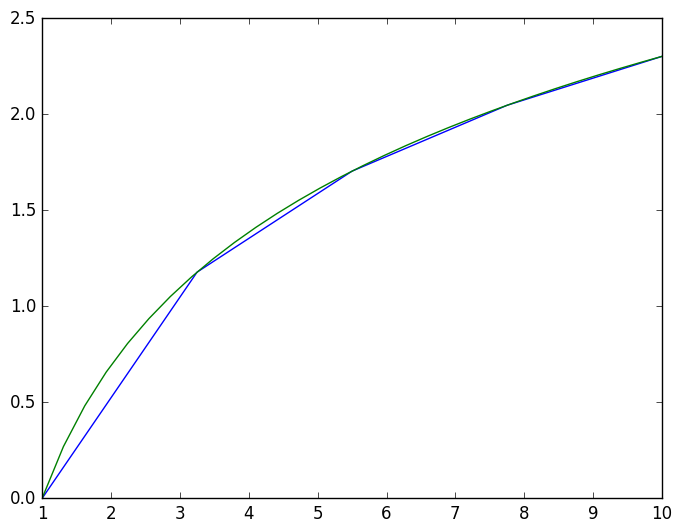

In [4]:
using PyPlot

plot(cgrid, cvals)
fgrid = linspace(1, 10, 30)
plot(fgrid, log(fgrid))
legend()

In [5]:
println("同様にsinを線形補間してみる")
cgrid = linspace(-5pi, 5pi, 30)
cvals = sin(cgrid)
println("cgridとして[-5π,  5π]を30分割した配列をとり, sinを適用した値をcvalに格納")

b = MyLinInterp.LinearInterpolation(cgrid, cvals)
println("この線形補間された関数とsinをplotしてみる")

同様にsinを線形補間してみる
cgridとして[-5π,  5π]を30分割した配列をとり, sinを適用した値をcvalに格納
この線形補間された関数とsinをplotしてみる


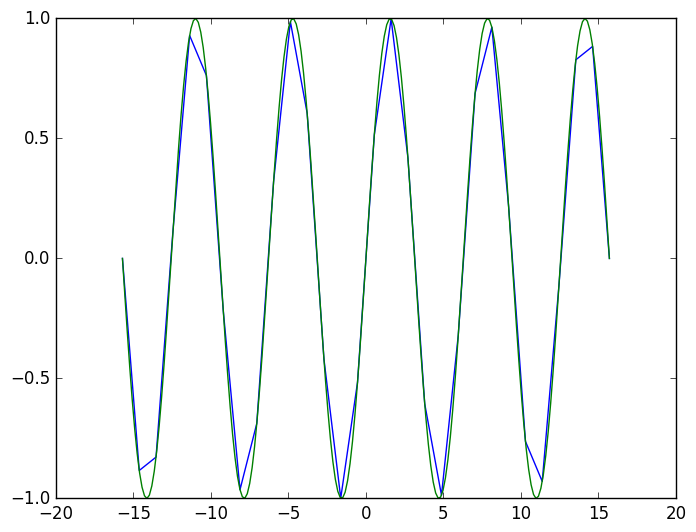

In [6]:
plot(cgrid, cvals)
fgrid = linspace(-5pi, 5pi, 200)
plot(fgrid, sin(fgrid))
legend()

exp(-1/2*x^2)を補完してみる
cgridとして[-5,  5]を20分割した配列をとり, 補完した値をcvalに格納


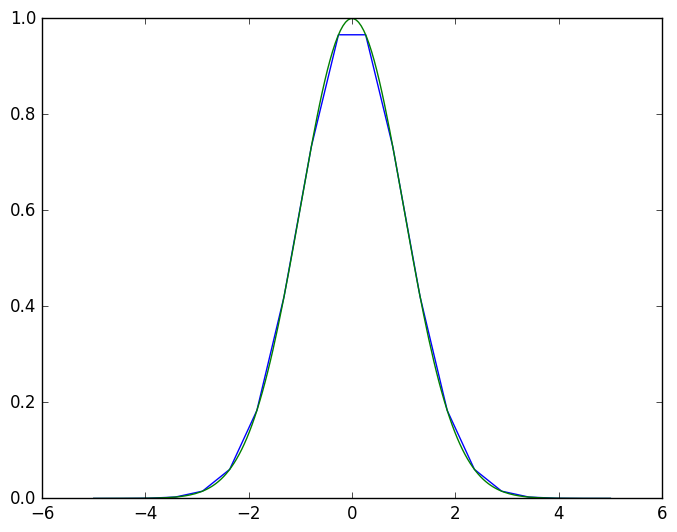

In [7]:
println("exp(-1/2*x^2)を補完してみる")

cgrid = linspace(-5, 5, 20)
cvals = exp(-1/2.*cgrid.^2)
println("cgridとして[-5,  5]を20分割した配列をとり, 補完した値をcvalに格納")

plot(cgrid, cvals)
fgrid = linspace(-5, 5, 200)
plot(fgrid, exp(-1/2 .* fgrid .^2))

legend()

この補完の残渣をプロットしてみる


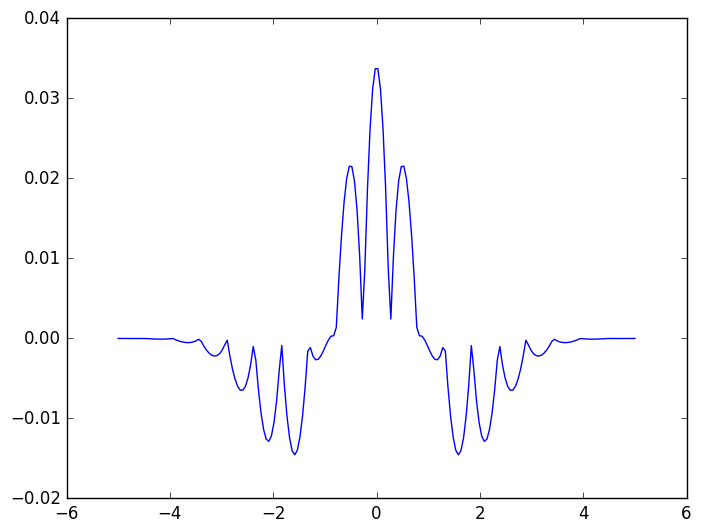

In [8]:
println("この補完の残渣をプロットしてみる")

cgrid = linspace(-5, 5, 20)
cvals = exp(-1/2.*cgrid.^2)
exp2 = MyLinInterp.LinearInterpolation(cgrid, cvals)

fgrid = linspace(-5, 5, 200)
plot(fgrid, exp(-1/2 .* fgrid .^2)-exp2(fgrid))

legend()

面白い形になったのでsinについても同じようにプロットしてみる


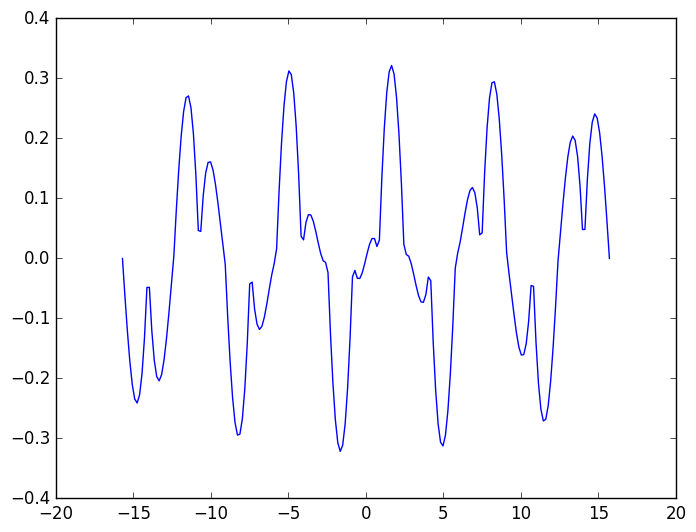

In [9]:
println("面白い形になったのでsinについても同じようにプロットしてみる")

cgrid = linspace(-5pi, 5pi, 20)
cvals = sin(cgrid)
sin2 = MyLinInterp.LinearInterpolation(cgrid, cvals)

fgrid = linspace(-5pi, 5pi, 200)
plot(fgrid, sin(fgrid )-sin2(fgrid))

legend()

正規分布の密度関数に関して
用いる配列の数を4から20まで変えたものをプロットしてみる


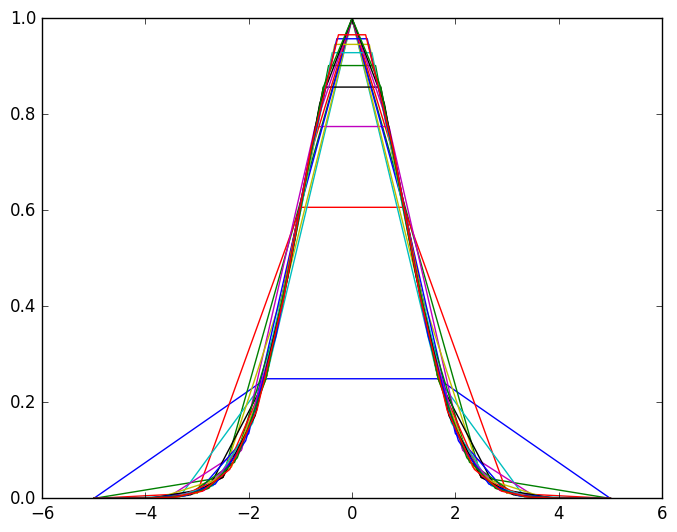

In [10]:
println("正規分布の密度関数に関して")
println("用いる配列の数を4から20まで変えたものをプロットしてみる")

for i in 4:20
    cgrid = linspace(-5, 5, i)
    cvals = exp(-1/2.*cgrid.^2)
    plot(cgrid, cvals)
end

legend()

用いるx座標を正規分布からランダムに10個発生させてとるのを２０回繰り返してプロットしてみる


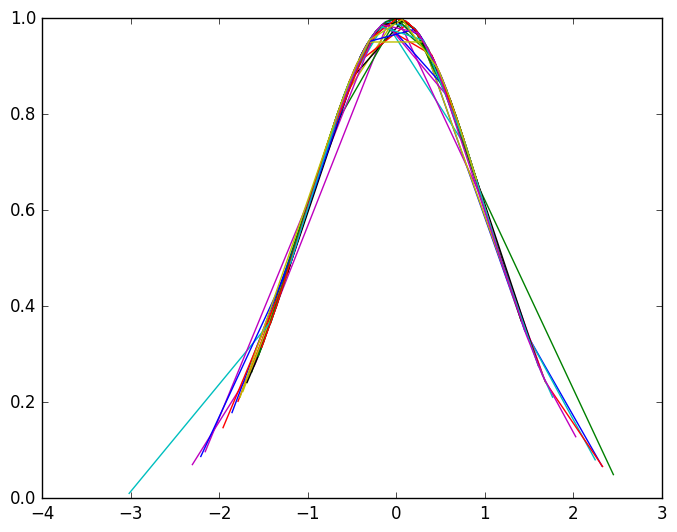

In [15]:
println("用いるx座標を正規分布からランダムに10個発生させてとるのを２０回繰り返してプロットしてみる")

for i in 1:20
    cgrid = sort(randn(10))
    cvals = exp(-1/2.*cgrid.^2)
    plot(cgrid, cvals)
end

legend()

補完に用いるx座標を一様分布からランダムに10個発生させてとるのを２０回繰り返してプロットしてみる


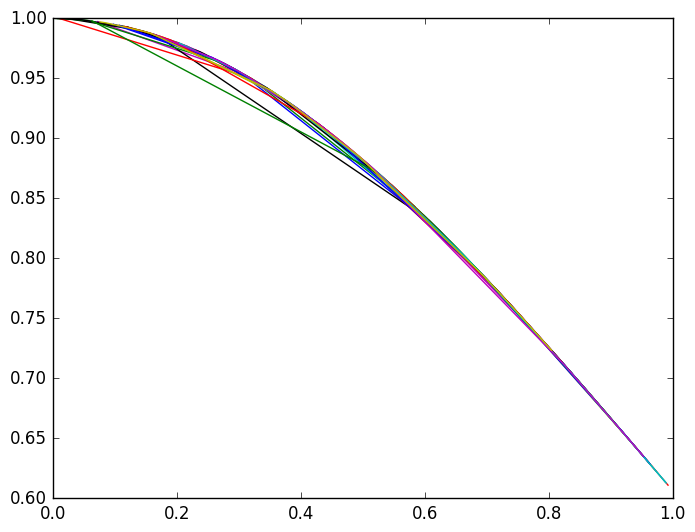

In [14]:
println("補完に用いるx座標を一様分布からランダムに10個発生させてとるのを２０回繰り返してプロットしてみる")

for i in 1:20
    cgrid = sort(rand(10))
    cvals = exp(-1/2.*cgrid.^2)
    plot(cgrid, cvals)
end

legend()

In [13]:
println("実数から複素数への関数を補完してみる")

g(x) = 2im * x
cgrid = linspace(1, 10, 20)
b = MyLinInterp.LinearInterpolation(cgrid, map(g, cgrid))
b(4)

実数から複素数への関数を補完してみる


0.0 + 8.0im